# Graphs and Networks

Understanding complex systems often requires a bottom-up analysis. This can be
done by examining the elementary parts of the system individually and then
by turning the analysis towards the connection between them. A natural way of
performing this type of analysis is through the use of **networks** or
**graphs**.

```{prf:definition}
A **graph** $G=(V,E)$ consists of a finite set $V$ of **vertices** (or nodes)
and a finite set $E$ of **edges**, where each edge $e\in E$ is of the form
$e=\{u,v\}$ with $u,v\in V$.
```

And we will make here the following simplifying assumptions:
- we do not allow any edge to be a self-loop, i.e., an edge that starts and ends
at the same vertex,
- we do not allow more than one edge between any pair of vertices,
- unless mentioned otherwise we will mostly consider undirected edges, that is
edge $e = \{u,v\} = \{v,u\}$.

Now, let us fix some notation and nomenclature.
```{prf:definition}
Two vertices, $u$ and $v$, are called **adjacent** if there is an edge, $uv$,
connecting them. We can express adjacency of $u$ and $v$ by writing $u\sim v.$
```

```{prf:definition}
If $v$ is a vertex in a graph $G$, the **degree** of $v$, denoted $\operatorname{deg}(v)$,
is the number of edges adjacent to $v$.
```

```{prf:definition}
A **walk** in a graph is a sequence of vertices and edges $v_0$, $e_1$, $v_1$, $e_2$, $v_2$, $\ldots$, $v_{k-1}$, $e_k$, $v_k$ such that edge $e_i$ connects vertices $v_{i-1}$ and $v_i$, for $1 \leq i \leq k$.
```

```{prf:definition}
A graph $G$ is **connected** if for any two vertices $u$ and $v$ of $G$,
there is a *walk* in $G$ from $u$ to $v$.
```

The first way to store a graph into a computer is as an **adjacency matrix**.
Given a graph $G$ with $n$ vertices, we start by label them from $1$ to $n$, then
the adjacency matrix representing this graph will be an $n\times n$ matrix
whose entries are either 0 or 1, specifically
```{math}
A(i,j) = \begin{cases}
1, & (v_i,v_j) \in E,\\
0, & \text{otherwise}.
\end{cases}
```

We now have much of the dictionary we need to start investigating some examples
of graphs and networks that are used in applications. We will uncover some more
information by working through the test cases.

## A social network made of dolphins

How can we use these abstract objects to model some systems of interest? We have
said from the beginning that graphs are useful to describe pairwise interactions
between vertices. We will start as usual from an example, and in particular we
will focus on the network of social relationship between a population of
Doubtful Sound bottlenose dolphins {cite}`lusseau2003emergent`. It has been
observed that gregarious, long-lived animals, such as gorillas (*Gorilla
gorilla*), deer (*Cervus elaphus*), elephants (*Loxodonta
africanus*) and bottlenose dolphins (*Tursiops truncatus*) rely
on information transfer to exploit their habitat. Thus investigating their
social structure is surely of interest.

First of all, let us fetch and load the data into the MATLAB environment

In [1]:
websave('dolphins.mat','https://suitesparse-collection-website.herokuapp.com/mat/Newman/dolphins.mat');
load('dolphins.mat')
disp(Problem)

      name: 'Newman/dolphins'
     title: 'social network of dolphins, Doubtful Sound, New Zealand'
         A: [62x62 double]
        id: 2396
      date: '2003'
    author: 'D. Lusseau'
      kind: 'undirected graph'
     notes: [19x75 char]
       aux: [1x1 struct]
        ed: 'M. Newman'



The variable `Problem` is a `struct` variables containing several information,
what mostly concerns us now is the field `Problem.A` that contains the **adjacency**
matrix of our graph. We can now use MATLAB to transform it into the graph
format and visualize it

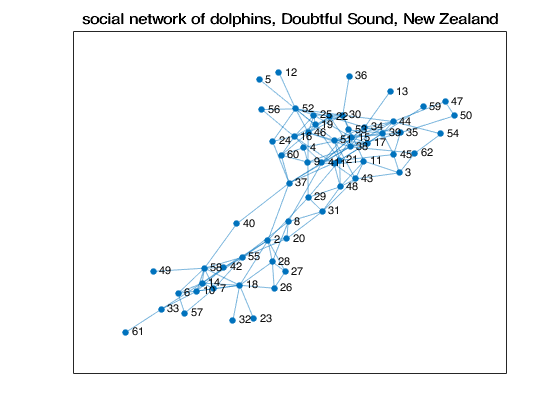

In [2]:
G = graph(Problem.A);
figure(1)
plot(G)
title(Problem.title)

What are we seeing? In the word of the *author* {cite}`lusseau2003emergent`:
> Every time that
a school of dolphins was encountered in the fjord between 1995 and
2001, each adult member of the school was photographed and identified from natural markings on the dorsal fin. This information was
used to determine how often two individuals were seen together. To
measure how closely two individuals were associated in the population (i.e. how often they were to be found together) I calculated a half-weight index (HWI) of association for each pair of individuals
(Cairns & Schwäger 1987). This index estimates the likelihood that
two individuals would be seen together compared with the likelihood
of seeing any of the two individuals when encountering a school: [...]
Over the 7 years of observation the composition of 1292
schools was gathered. There were 64 adult individuals in
this social network linked by 159 preferred companionships (edges)

Now let us  try to investigate some properties of the network to infer some
information on the dolphins. The first thing we want to look at are the **degrees**
of the vertexes:

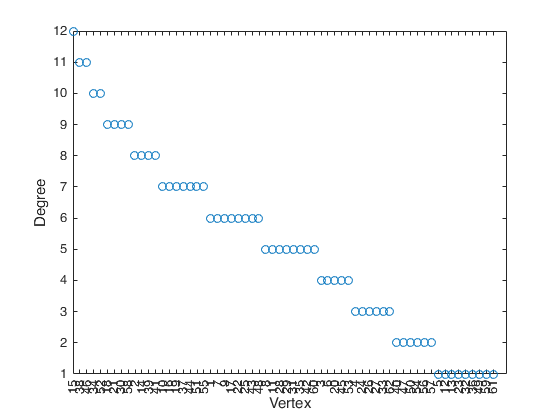

In [3]:
degree = G.degree;
[sorted_degree,rank] = sort(degree,'descend');
figure(2)
plot(1:G.numnodes,sorted_degree,'o');
axis([1 64 1 max(degree)])
xlabel('Vertex')
ylabel('Degree')
xticks(1:G.numnodes)
xticklabels(rank)
xtickangle(90)

The behavior of the (reordered) degree distribution seem suspicious... let us
look more into it, we call $k$ the degree and $p(k)$ the number of nodes with
that degree

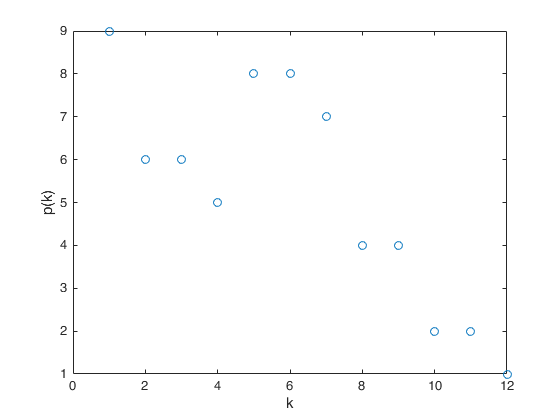

In [4]:
[gc,gr] = groupcounts(degree);
figure(3)
plot(gr,gc,'o')
xlabel('k')
ylabel('p(k)')

Now we observe that the behavior for smaller degree is uncertain, while the data
clearly exhibit a *tail* (an *asymptotic*) that decays as a power law. Let us
use the techinique for parameter estimation we have seen in the last topic for
this case

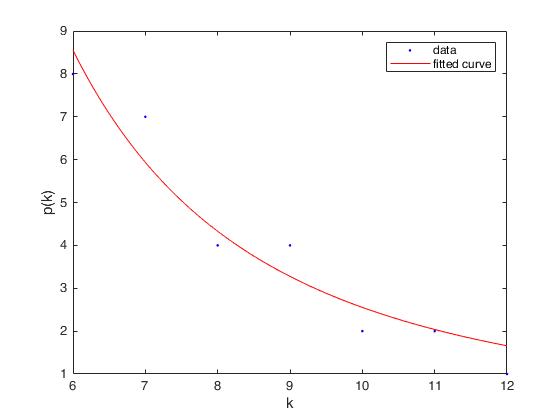

In [5]:
fo = fitoptions('Method','NonlinearLeastSquares',...
               'Lower',[0 0],...
               'Upper',[Inf Inf],...
               'StartPoint',[1 1]);
ft = fittype('a*x.^(-b)','options',fo);
[curve,gof] = fit(gr(6:end),gc(6:end),ft);
% We plot the results
figure(1)
plot(curve,gr(6:end),gc(6:end))
xlabel('k');
ylabel('p(k)');

We have obtained a reasonable fit

In [6]:
disp(curve);

     General model:
     curve(x) = a*x.^(-b)


     Coefficients (with 95% confidence bounds):
       a =       592.1  (-381.8, 1566)
       b =       2.365  (1.523, 3.208)


with $p(k) \sim k^{-2.365}$.

::::{admonition} Scale-free networks
:class: tip

A **scale-free** network is a network whose degree distribution follows a power
law, at least *asymptotically*. That is, the fraction $p(k)$ of nodes in the
network having degree $k$ behaves for large values of $k$ as
```{math}
p(k) \sim k^{-\alpha}, \quad 2 < \alpha < 3.
```
::::

This type of networks have usually several properties that we can use to
interpret the underlying phenomena. One of them is that they usually have a
*small diameter*, that is, the length of the "longest shortest path", i.e.,
the largest number of vertices which must be traversed in order to travel
from one vertex to another when paths which backtrack, detour, or loop are
excluded from consideration. We can compute it by doing

In [7]:
diameter = max(distances(G),[],'all');
disp(diameter)

     8



Thank to this property, dolphin scale-free network is *resilient to random
attacks*. If we remove some random nodes the increase in the diameter is small:

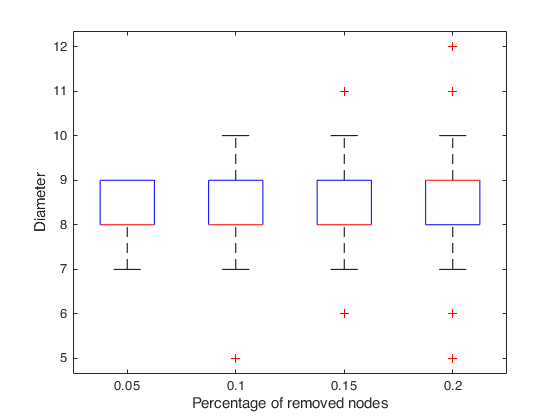

In [8]:
percentage_of_removed = [0.05,0.10,0.15,0.20];

for j=1:length(percentage_of_removed)
    percentage = percentage_of_removed(j);
    for i = 1:500
        H = G;
        removednodes = randi(G.numnodes,floor(percentage*G.numnodes),1);
        H = H.rmnode(removednodes);
        [bin,binsize] = conncomp(H);
        idx = binsize(bin) == max(binsize);
        SG = subgraph(H, idx);
        diameters(j,i) = max(distances(SG),[],'all');
    end
end

figure(4)
boxplot(diameters.')
ylabel('Diameter')
xlabel('Percentage of removed nodes')
xticklabels(percentage_of_removed);

## Finding communities

Let us start again from an example, we consider here some data from {cite}`van2014cooperative`
related to the behavior of a specie of *social birds* that nest in communal
chambers. These contains a set of networks constructed in the following way:
> An individual was assigned to a given nest chamber once it had been observed
to enter it, irrespective of the activity carried out, i.e. either building the
nest chamber or roosting in it. A network ‘edge’ was drawn between individuals
that used the same nest chambers either for roosting or nest-building at any
given time within a series of observations at the same colony in the same year,
either together in the nest chamber at the same time or at different times.
These individuals werethus assumed to be associated.

We read from the [data file](https://github.com/Cirdans-Home/recipesforenvsciences/raw/main/src/aves-wildbird-network-1.edges) the nodes,
and edges of the network. The file (that we obtained from the Network Repository {cite}`nr`)
is not formatted as a CSV file, but has instead spaces to separate the data,
thus we use the command `dlmread`, that generalizes the `csvread` command

In [9]:
data = dlmread('aves-wildbird-network-1.edges');

with this we have obtained a matrix with three columns and number of edges rows
in which the first column represents the starting node, the second column the
ending node, and the third one the edge weight. With this data we can build
a graph

In [10]:
G = graph(data(:,1),data(:,2),data(:,3));

and then plot it

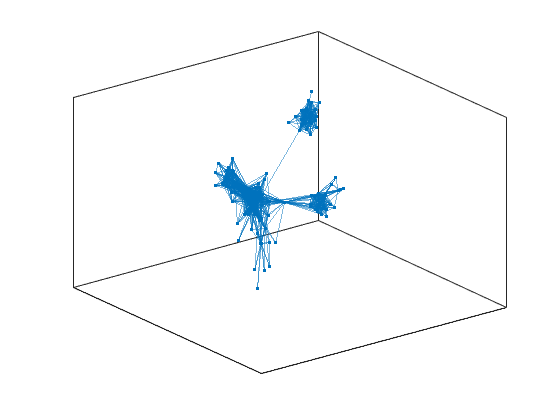

In [11]:
plot(G,'Layout',"force3");

From the plot we suspect that we can identify two communities in our set of
birds, but how can we do it mathematically? This task is called a task of
**community detection**, and there are many algorithms and strategies for
achieving it. We are going to focus here on a techinique that is
called **spectral clustering**. First of all we need a particular representation
of the network with a *matrix* called a *Laplacian of the network*:

In [12]:
L = laplacian(G);

Then we recover the **spectral information** by the command:

In [13]:
[v,l] = eigs(L,2,'smallestabs');

This gives us two vectors $\mathbf{v}_1$ and $\mathbf{v}_2$ and two values
$\lambda_1$ and $\lambda_2$ such that
```{math}
L \mathbf{v}_1 = \lambda_1 \mathbf{v}_1, \quad L \mathbf{v}_2 = \lambda_2 \mathbf{v}_2,
```
these are called, respectively, **eigenvectors**, and **eigenvalues**. If
we inspect them we observe that $v_1(i) > 0$ for all $i = 1,\ldots,N$, and
moreover it has a constant value. The second one, is the one we are actually
interested in, this has both values that are $> 0$ and $< 0$. We are going to
use them to determine the communities:

In [14]:
ind1 = find(v(:,2) > 0);
ind2 = find(v(:,2) < 0);

Now let us evidentiate the nodes on the graph

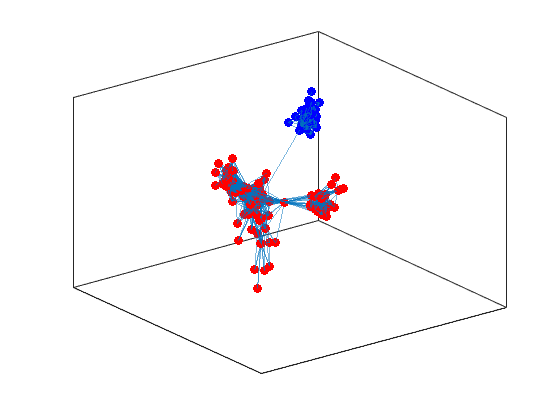

In [15]:
h = plot(G,'Layout',"force3");
highlight(h,ind1,"NodeColor",'red',"MarkerSize",6)
highlight(h,ind2,"NodeColor",'blue',"MarkerSize",6)

and as you can observe the procedure did evidentiate the two communities we
were suspecting by working directly on the data. On the other hand, now that
we look better at the data, we suspect that there could be more than two
communities, the larger one seems to be splittable in two. We can try to
identify larger number of communities, by **computing more eigenvectors**

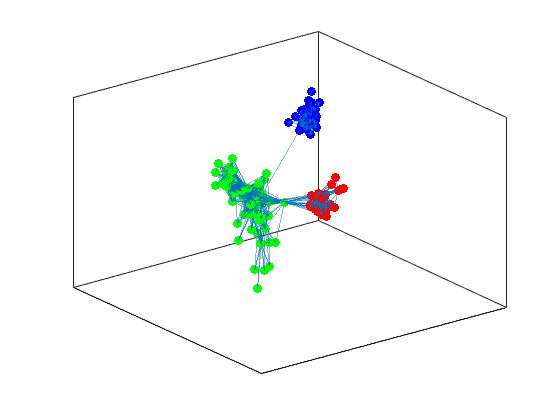

In [16]:
[v,l] = eigs(L,3,'smallestabs');
idx = kmeans(v(:,2:3),3);
ind1 = find(idx == 1);
ind2 = find(idx == 2);
ind3 = find(idx == 3);
h = plot(G,'Layout',"force3");
highlight(h,ind1,"NodeColor",'red',"MarkerSize",6)
highlight(h,ind2,"NodeColor",'blue',"MarkerSize",6)
highlight(h,ind3,"NodeColor",'green',"MarkerSize",6)

now we don't have a clear cut between positive and negative values in a single
vector, thus we have to employ another algorithm to do the separation for us.
This is the **$K$-means** algorithm that returns as a vector of indexes for the
corresponding communities.

:::{tip}
$K$-means is a *clustering method* that uses the process of **vector quantization**,
it was originally devised in the signal processing community with the aims of
partitioning $n$ observations into $k$ clusters in which each observation
belongs to the cluster with the nearest mean, i.e., the mean servs as a
prototype of the cluster.

It can be formally expressed as the minimization problem
```{math}
\arg\min_{\mathbf{S}=\{S_1,\ldots,S_k\}} \sum_{i=1}^{k}\sum_{\mathbf{x} \in S_i} \| \mathbf{x} - \mathbf{\mu}_i\|^2,
```
where we are given $\{\mathbf{x}_1,\ldots,\mathbf{x}_n\}$ observations, to
cluster in $k\,(\leq n)$ groups $\{S_1,\ldots,S_k\}$, and $\mathbf{\mu}_i$ is
the mean of the points in $S_i$.
:::

But how do we know if we haven't lost some community in our analysis? To test
this idea we can use another concept from graph theory that is called **modularity**.

```{prf:definition}
**Modularity** is a measure of the structure of networks or graphs which measures
the strength of division of a network into communities, it is computed as
the fraction of the edges that fall within the given groups minus the expected
fraction if edges were distributed at random.
```

There are several ways for computing this quantity, we give here a very
straigthforward
```{code} matlab
function Q = modularity(A, g)
%% MODULARITY computes the modularity of the of the partition in group g of the
% graph with adjacency matrix A.

nCommunities = numel(unique(g));
nNodes = length(g);

e = zeros(nCommunities);
for i = 1:nNodes
    for j = 1:nNodes
        e(g(i), g(j)) = e(g(i), g(j)) + A(i, j);
    end
end
nEdges = sum(A(:));  % we could use nnz(A), but we want to take into account weights
a_out = sum(e, 2);   % out-degree
a_in = (sum(e, 1))'; % in-degree
a = a_in.*a_out/nEdges^2;
Q = trace(e)/nEdges - sum(a);

end
```
and we try to use it to evaluate the communities we have found

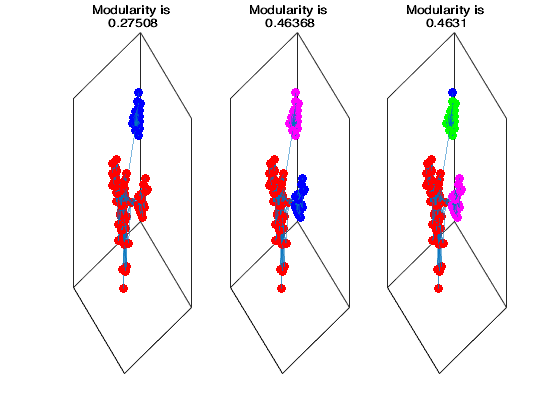

In [17]:
%% Analysis of Community Structure
addpath('matlabcodes')
data = dlmread('aves-wildbird-network-1.edges');
color = {'red','blue','magenta','green'};
G = graph(data(:,1),data(:,2),data(:,3));
L = laplacian(G);
for i = 1:3
    [v,l] = eigs(L,i+1,'smallestabs');
    groupvec = kmeans(v(:,2:i+1),i+1);
    figure(1)
    subplot(1,3,i);
    h = plot(G,'Layout',"force3");
    for j = 1:i+1
       ind = find(groupvec == j);
       highlight(h,ind,"NodeColor",color{j},"MarkerSize",6)
    end
    Q = modularity(adjacency(G),groupvec);
    title(['Modularity is ',string(Q)])
end
set(gcf,'Position',[-1984 426 1301 395]);

from which we observe that if we try to find more than three communities the
modularity starts decreasing. Thus it seems that we are done with three
communities for this dataset.

::::{exercise}
We write a function that looks for in a graph up to $n$ communities and returns
the number of communities within $n$ with the highest modularity.

```{code} matlab
function [groups,outmodularity,optimum] = findcommunities(G,k)
%%FINDCOMMUNITIES looks in G up to n communities and returns the number
%of communities within n with the highest modularity.
%   G = graph
%   k = maximum number of communities

if (k > G.numnodes)
    error("You cannot have more than number of nodes communities");
end
if (k < 2)
    error("You cannot have less than 2 communities");
end

% Allocate the space for the groups matrix of number of nodes rows and
% k-1 columns

% Allocate the space for the modularities: vector with k-1 entries

% Loop through the possible community size
% | Compute eigenvectors
% | Use k-means
% | Compute modularity
% end of the for loop

% Compute the index for which maximum modularity is obtained

end
```

You can test the algorithm on some of the networks on some [Animal social networks](https://networkrepository.com/asn.php).

:::{tip} To ensure that the function also automatically produces graphs highlighting the
communities, the following two auxiliary codes can be used:
- [Generate maximally perceptually-distinct colors](https://it.mathworks.com/matlabcentral/fileexchange/29702-generate-maximally-perceptually-distinct-colors) This function generates a set
of colors which are distinguishable by reference to the "Lab" color space, which
more closely matches human color perception than RGB.
- [neatly arrange subplots](https://it.mathworks.com/matlabcentral/fileexchange/26310-numsubplots-neatly-arrange-subplots) Sometimes a graphing function will not know in advance how many
sub-plots are to be created. This function produces reasonable values for the
row and column inputs to subplot given the number of desired sub-plots.
:::

::::

## Centrality

The next type of analysis we want to address is the computation of a
**node centrality score**, this type of analysis can (usually) be done by
employing some *topological* measures, i.e., that depends only on the
connections of the nodes, to score nodes by their "importance".

::::{prf:definition}
A **graph Centrality measures** are scalar values given to each node in the
graph $G = (V,E)$ to quantify its *importance*. The definition of what is
*important* depends on the underlying model assumption.
::::

Let us see some **measures** on a sample graph $G = (V,E)$ that could be, e.g.,
the *contact network* [ia-infect-hyper.mtx](https://github.com/Cirdans-Home/recipesforenvsciences/raw/main/src/data/ia-infect-hyper.mtx)
where nodes represent humans and edges between them represent proximity, i.e.,
a contact for a given period of time in the physical world; see {cite}`nr`.

In [18]:
addpath('./data')
data = dlmread('ia-infect-hyper.mtx',' ',2,0);
G = graph(data(:,1),data(:,2));
fprintf("G is a Network with %d nodes and %d edges.\n",G.numnodes,G.numedges);

G is a Network with 113 nodes and 2196 edges.


- **Degree centrality**. It is defined as the number of node neighbors for each
node in the graph. If the network is directed, we have two versions of this
measure: the *in-degree* is the number of incoming edges, and the *out-degree*
that is in turn the number of out-going edges. This is a *local measure*, that
means that as a measure it doesn't take neighbors connectivity into account.
It can be interpreted as a form of popularity.

In [19]:
degree_centrality = G.degree;

- **Closeness centrality**. This centrality measures node efficiency in terms
of connection to other nodes. Is defined as the average length of the shortest
path between the node and all other nodes in the graph, i.e., the more central
a node is, the closer it is to all other nodes.
```{math}
v \in V, \quad C(v) =  \frac{1}{\sum_{w \in V} d(v,w)}.
```

In [20]:
closeness_centrality = centrality(G,"closeness");

- **Betweenness centrality**. This measure quantifies the number of times a
node acts as a *bridge* along the shortest path between two other nodes, that is,
let us say that we want to compute it for a vertex $v \in V$. We first compute
**all** the shortest paths between each pair of vertices $(s,t)$, then for each
of the couples we determine the fraction of shortest paths that pass through $v$.
The measure is then the sum this fraction over all pairs of vertices, succinctly
```{math}
v \in V, \quad B(v) = \sum_{s \neq v \neq t \in V} \frac{\sigma_{st}(v)}{\sigma_{st}}, \; \begin{array}{l}
\sigma_{st} = |\{ \text{shortest paths between s and t }\}|, \\ \sigma_{st}(v) = |\{ \text{shortest paths between s and t passing per v}\}|.
\end{array}
```

In [21]:
betweenness_centrality = centrality(G,"betweenness");

- **Eigenvector centrality**.  It assigns relative scores to all nodes in the
network based on the *assumption* that "connections to important nodes
matters more to the score of the node we are looking at than equal
connections to low importance nodes". This idea can be formalized in different
ways. The first we consider is the case in which we use the *eigenvector*
corresponding to the *largest eigenvalue* of the graph adjacency matrix.

In [22]:
eigenvector_centrality = centrality(G,"eigenvector");

- **PageRank**. This is the algorithm used by Google Search to rank the web
pages in their search engine results. The score given by this algorithm is a
*probability distribution* representing the likelihood of randomly exploring
the network and arriving at any particular page.
```{math}
\mathbf{p} = \mathbf{p}\left(\gamma P + (1-\gamma) \mathbf{v}\mathbf{1}^T\right),  \quad P = \operatorname{diag}(A\mathbf{1})^{-1}A,\; \gamma \in [0,1], \; \mathbf{1}^T\mathbf{v} = 1.
```

In [23]:
pagerank_centrality = centrality(G,"pagerank");

We can now try to look at the most-important nodes for the different measures.
Since we are only interested in the ranking (and not in the actual value of
the measure) we will make use of the `sort` function from MATLAB to get the
information we want

In [24]:
[~,degree_rank] = sort(degree_centrality,"descend");
[~,closeness_rank] = sort(closeness_centrality,"descend");
[~,betweenness_rank] = sort(betweenness_centrality,"descend");
[~,eigenvector_rank] = sort(eigenvector_centrality,"descend");
[~,pagerank_rank] = sort(pagerank_centrality,"descend");

rankings = table(degree_rank,closeness_rank,betweenness_rank,...
    eigenvector_rank,pagerank_rank,'VariableNames',...
    {'Degree','Closeness','Betweenness','Eigenvector','PageRank'});
disp(head(rankings))

    Degree    Closeness    Betweenness    Eigenvector    PageRank


    ______    _________    ___________    ___________    ________



      30          30            30             30           30   


      38          38            42            102           42   


      42          42            33             38           38   


     102         102            38             42          102   


      33          33           102             33           33   


      48          48            12             48           48   


      12          12            48             34           12   
      34          34            34             12           34   


To compare the different rankings we can also look at the **scatter plot** of
the rankings, e.g.,

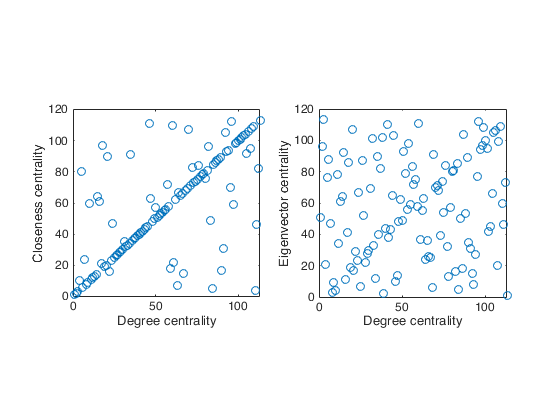

In [25]:
figure(1)
subplot(1,2,1);
plot(degree_rank,closeness_rank,'o');
xlabel('Degree centrality')
ylabel('Closeness centrality')
axis square
subplot(1,2,2);
plot(degree_rank,eigenvector_rank,'o');
xlabel('Degree centrality')
ylabel('Eigenvector centrality')
axis square

In general it would be better to have also a **quantitative way** of comparing
the rankings. We can go for a *statistical test*, in this case a good solution
is the Kendall $\tau$ test.

The Kendall $\tau$ coefficient is defined as:
```{math}
\tau = \frac{(\text{number of concordant pairs}) - (\text{number of discordant pairs})}{
 {n \choose 2} }.
```
Where ${n \choose 2} = {n (n-1) \over 2}$ is the **binomial coefficient** for
the number of ways to choose two items from $n$ items.
We can compute it in MATLAB (together with the relevant $p$-value) by doing:

In [26]:
[tau,pval] = corr(degree_rank,closeness_rank,'type','Kendall');
fprintf("Degree vs Closeness tau = %f p-value = %e.\n",tau,pval);
[tau,pval] = corr(degree_rank,eigenvector_rank,'type','Kendall');
fprintf("Degree vs Eigenvector tau = %f p-value = %e.\n",tau,pval);

Degree vs Closeness tau = 0.581226 p-value = 7.253673e-20.


Degree vs Eigenvector tau = 0.099558 p-value = 1.185833e-01.


:::{warning}
Every **centrality measure** is based on an assumption about the concept of
importance, e.g, *closeness* and *betweenness* centralities define the importance
as an evaluation of the information exchange efficiency within the networks.
Others like the degree are purely local popularity measure, while the ones
based on the eigenvectors tend to reward highly connected nodes. You should
always select your measure while taking into account the model behind the choice.
:::

## Bibliography

```{bibliography}
:filter: docname in docnames
```